# Retail Analysis with Walmart Data


#### DESCRIPTION :
> One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. 
There are certain events and holidays which impact sales on each day. There are sales data available for 45 
stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, 
due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and 
ingest factors like economic conditions including CPI, Unemployment Index, etc.

> Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, 
the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including 
these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge 
presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of 
complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are 
available.


#### Holiday Events :
> 1. __Super Bowl :__ 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
> 2. __Labour Day :__ 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
> 3. __Thanksgiving :__ 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
> 4. __Christmas :__ 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Analysis Tasks.

> #### Basic Statistics tasks :
> * Which store has maximum sales
> * Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
> * Which store/s has good quarterly growth rate in Q3’2012
> * Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
> * Provide a monthly and semester view of sales in units and give insights


> #### Statistical Model :
For Store 1 – Build  prediction models to forecast demand
> * Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
> * Change dates into days by creating new variable.
> * __Select the model which gives best accuracy.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import sklearn as sk
import statsmodels as sm

from datetime import datetime as dt
from datetime import datetime as date

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## EDA 🔨

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


* Change date to datetime format
* __Weekly_Sales is target variable here__
* No missing values.
* Shape is (6435, 8)

In [4]:
# Date formatting : 
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [6]:
data['DateType'] = [dt.strptime(date, '%Y-%m-%d').date() for date in data['Date'].astype(str).values.tolist()]

## Holidays :

In [7]:
data['Superbowl'] = np.where((data['DateType'] == dt(2010, 2, 12).date()) | (data['DateType'] == dt(2011, 2, 11).date())| 
                             (data['DateType'] == dt(2012, 2, 10).date()) | (data['DateType'] == dt(2013, 2, 8).date()),1, 0)

data['Labor_Day'] = np.where((data['DateType'] == dt(2010, 9, 10).date()) | (data['DateType'] == dt(2011, 9, 9).date()) | 
                             (data['DateType'] == dt(2012, 9,  7).date()) | (data['DateType'] == dt(2013, 9, 6).date()),1, 0)

data['Christmas'] = np.where((data['DateType'] == dt(2010, 12, 31).date()) | (data['DateType'] == dt(2011, 12, 30).date())| 
                             (data['DateType'] == dt(2012, 12, 28).date()) | (data['DateType'] == dt(2013, 12, 27).date()),1, 0)

data['Thanksgiving'] = np.where((data['DateType'] == dt(2010, 11, 26).date())| (data['DateType'] == dt(2011, 11, 25).date())|
                                (data['DateType'] == dt(2012, 11, 23).date())|(data['DateType'] == dt(2013, 11, 29).date()),1,0)

In [8]:
print(data.Superbowl.value_counts())
print(data.Labor_Day.value_counts())
print(data.Thanksgiving.value_counts())
print(data.Christmas.value_counts())

0    6435
Name: Superbowl, dtype: int64
0    6390
1      45
Name: Labor_Day, dtype: int64
0    6345
1      90
Name: Thanksgiving, dtype: int64
0    6345
1      90
Name: Christmas, dtype: int64


## 1. Which store has maximum sales

In [9]:
store_sales = data.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending = False)
round(store_sales, 1).head()

Store
20    301397792.5
4     299543953.4
14    288999911.3
13    286517703.8
2     275382441.0
Name: Weekly_Sales, dtype: float64

#### __So, the store 20 has maximum sales.__

## 2.  Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [10]:
store_std = data.groupby(['Store'])['Weekly_Sales'].std().sort_values(ascending = False)
round(store_std, 2).head()

Store
14    317569.95
10    302262.06
20    275900.56
4     266201.44
13    265507.00
Name: Weekly_Sales, dtype: float64

In [11]:
store_mean = data.groupby(['Store'])['Weekly_Sales'].mean().sort_values(ascending = False)

coeff_variance = round(store_std / store_mean, 2)

coeff_variance.sort_values(ascending = False).head()

Store
35    0.23
7     0.20
15    0.19
23    0.18
29    0.18
Name: Weekly_Sales, dtype: float64

### Insights :
>* __coeff_variance__ gives the coefficient of variance w.r.t particular stores of the dataset, as shown above.
>* Store __14__ has the maximum standard deviation.

##  3.  Which store/s has good quarterly growth rate in Q3’2012

In [12]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter

data.drop(columns = 'DateType', inplace = True)

data.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Superbowl,Labor_Day,Christmas,Thanksgiving,Year,Month,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,2010,12,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,2010,2,1


In [13]:
q3 = data[(data['Quarter'] == 3) & (data['Year'] == 2012)].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)
q3.head(3)

Store
4     25652119.35
20    24665938.11
13    24319994.35
Name: Weekly_Sales, dtype: float64

### Insight :
* Store __4__ has good quarterly growth rate in Q3’2012 with __maximum__ profit of $25652119.35$ compared with other stores.

#### Growth Rate :
* Growth rate formula is defined as the ratio of difference in present value to past value by past value whole multiplied with 100 (since it is in percentage)
* ((Present value — Past value )/Past value )*100

In [14]:
Q3_date_from = pd.Timestamp(date(2012, 7, 1))
Q3_date_to = pd.Timestamp(date(2012, 9, 30))
Q2_date_from = pd.Timestamp(date(2012, 4, 1))
Q2_date_to = pd.Timestamp(date(2012, 6, 30))

#Collecting the data of Q3 and Q2 from original dataset.
Q2data = data[(data['Date'] > Q2_date_from) & (data['Date'] < Q2_date_to)]
Q3data = data[(data['Date'] > Q3_date_from) & (data['Date'] < Q3_date_to)]

#finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace = True)

#finding the sum weekly sales of each store in Q2
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns = {'Weekly_Sales': 'Q3_Weekly_Sales'},inplace = True)

#mergeing Q2 and Q3 data on Store as a common column
Q3_Growth= Q2.merge(Q3,how =  'inner',on = 'Store')

#Calculating Growth rate of each Store and collecting it into a dataframe  
Q3_Growth['Growth_Rate'] = (Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales']) / Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate'] = round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending = False).head(3)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03
6,7,7613593.92,7322393.92,-0.04
34,35,10753570.97,10252122.68,-0.05


In [15]:
Q3_Growth.sort_values('Growth_Rate',ascending = False).tail(3)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
35,36,4090378.90,3578123.58,-0.13
44,45,10278900.05,8851242.32,-0.14
13,14,24427769.06,20140430.40,-0.18


### Insights :
> * From above information we can say that Q3 growth rate is in __loss.__
> * Store 16 has the __least loss__ of 3% compared with other stores.
> * Store 14 has the __highest loss__ total of 18%

## 4.  Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [16]:
round(data.groupby(['Holiday_Flag'])['Weekly_Sales'].sum(),1)

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

In [17]:
print('0 :', 6.231919e+09)
print('1 :', 5.052996e+08)

0 : 6231919000.0
1 : 505299600.0


In [18]:
Spr_sales = data.groupby(['Superbowl'])['Weekly_Sales'].mean()

Ld_sales = data.groupby(['Labor_Day'])['Weekly_Sales'].mean()

Thanksg_sales = data.groupby(['Thanksgiving'])['Weekly_Sales'].mean()

Christmas_sales = data.groupby(['Christmas'])['Weekly_Sales'].mean()

Non_Holi_Sales = data[(data['Holiday_Flag'] == 0)].groupby('Holiday_Flag')['Weekly_Sales'].mean()


print(round(Spr_sales, 2))
print(round(Ld_sales, 2))
print(round(Thanksg_sales, 2))
print(round(Christmas_sales, 2))
print(round(Non_Holi_Sales, 2))

Superbowl
0    1046964.88
Name: Weekly_Sales, dtype: float64
Labor_Day
0    1047019.68
1    1039182.83
Name: Weekly_Sales, dtype: float64
Thanksgiving
0    1040946.32
1    1471273.43
Name: Weekly_Sales, dtype: float64
Christmas
0    1048186.60
1     960833.11
Name: Weekly_Sales, dtype: float64
Holiday_Flag
0    1041256.38
Name: Weekly_Sales, dtype: float64


## Visualizing :📚

### 1. Sales in Super Bowl holiday.

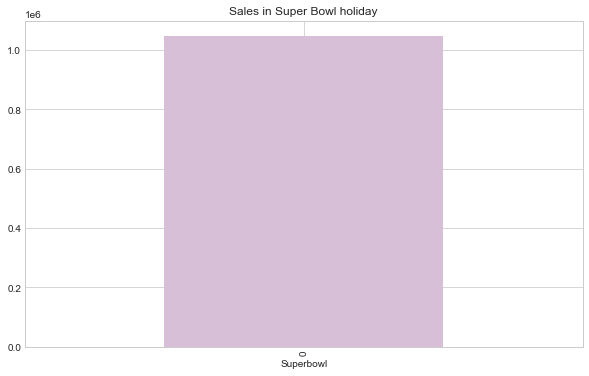

In [19]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
Spr_sales.plot(kind = 'bar', legend = False, title = 'Sales in Super Bowl holiday', color = 'thistle')
plt.show()

### 2. Sales in Labor Day holiday.

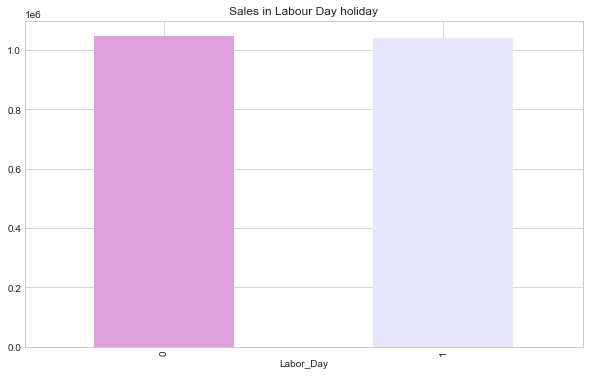

In [20]:
plt.figure(figsize = (10, 6))
Ld_sales.plot(kind = 'bar', legend = False, title = 'Sales in Labour Day holiday', color = ['plum','lavender'])
plt.show()

### 3. Sales in Thanksgiving holiday.

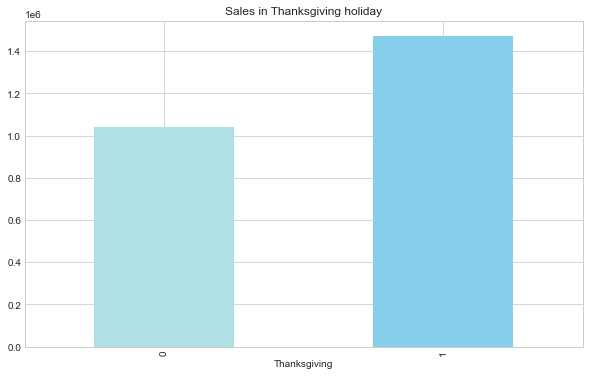

In [21]:
plt.figure(figsize = (10, 6))
Thanksg_sales.plot(kind = 'bar', legend = False, title = 'Sales in Thanksgiving holiday', color = ['powderblue','skyblue'])
plt.show()

### 4. Sales in Christmas holiday.

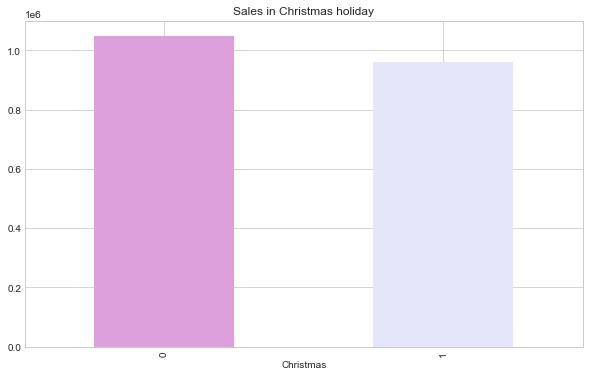

In [22]:
plt.figure(figsize = (10, 6))
Christmas_sales.plot(kind = 'bar', legend = False, title = 'Sales in Christmas holiday', color = ['plum','lavender'])
plt.show()

### 5. Non Holiday Sales.

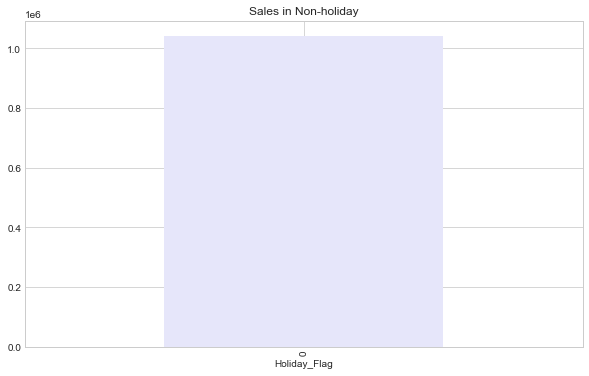

In [23]:
plt.figure(figsize = (10, 6))
Non_Holi_Sales.plot(kind = 'bar', legend = False, title = 'Sales in Non-holiday', color = 'lavender')
plt.show()

## 5. Provide a monthly and semester view of sales in units and give insights.


### I. Monthly sales view

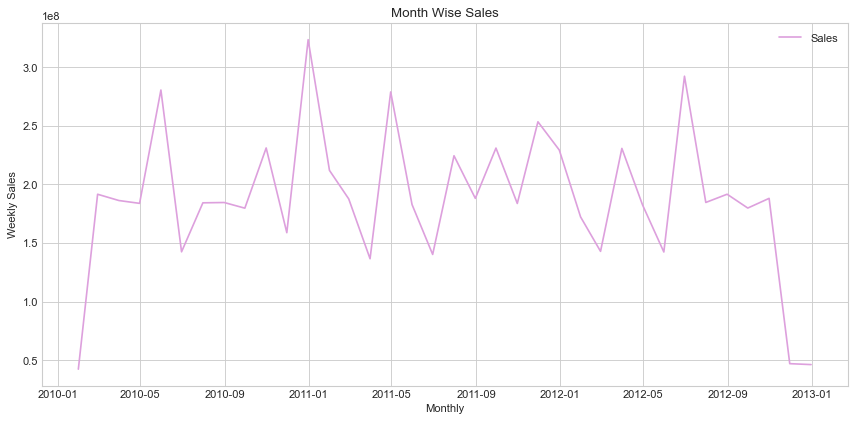

In [24]:
monthly = data.groupby(pd.Grouper(key = 'Date', freq = '1M')).sum()
monthly = monthly.reset_index()
fig, ax = plt.subplots(figsize=(13,6), dpi = 80)
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y, color = 'plum')
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly Sales')
plt.legend(['Sales'])
plt.show()

### II. Semester wise sales view

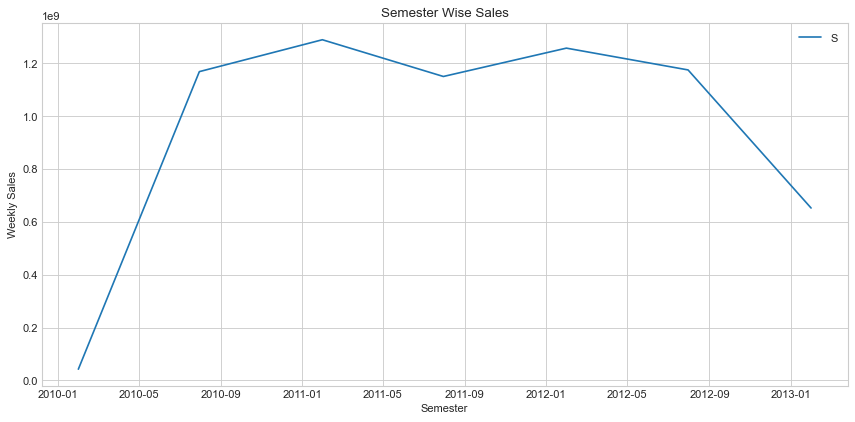

In [25]:
Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(13,6), dpi = 80)
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly Sales')
plt.legend('Sales')
plt.show()

### Insights :
> * We can infer that there's a big spike in sales from __February-2010__ to __February-2011__. Exactly for one year we can say.
> * Then spike goes __bit down__ in February-2011 after that again there are few __ups-downs__ in further.
> * From __August-2012__ sales goes __down__. **-** We can acknowledge that there is __loss__ in sales.

# For Store 1 – Build  prediction models to forecast demand

In [26]:
data.drop(columns = ['Superbowl', 'Labor_Day', 'Christmas', 'Thanksgiving'], inplace = True)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [28]:
data['Store']

0        1
1        1
2        1
3        1
4        1
        ..
6430    45
6431    45
6432    45
6433    45
6434    45
Name: Store, Length: 6435, dtype: int64

In [29]:
data['Store'] = data['Store'].astype(str)
data['Store'] = 'Store ' + data['Store'].astype(str)

data.Store

0        Store 1
1        Store 1
2        Store 1
3        Store 1
4        Store 1
          ...   
6430    Store 45
6431    Store 45
6432    Store 45
6433    Store 45
6434    Store 45
Name: Store, Length: 6435, dtype: object

In [30]:
labelEncod = LabelEncoder()
store_1 = data[data['Store'] == 'Store 1']
store_1 = store_1.copy()

store_1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,Store 1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,Store 1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,4
2,Store 1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1
3,Store 1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1
4,Store 1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,2


In [31]:
store_1['Days'] = labelEncod.fit_transform(store_1['Date'])
store_1.drop(['Store','Date','Holiday_Flag','Year','Month','Quarter'], axis=1 , inplace = True)

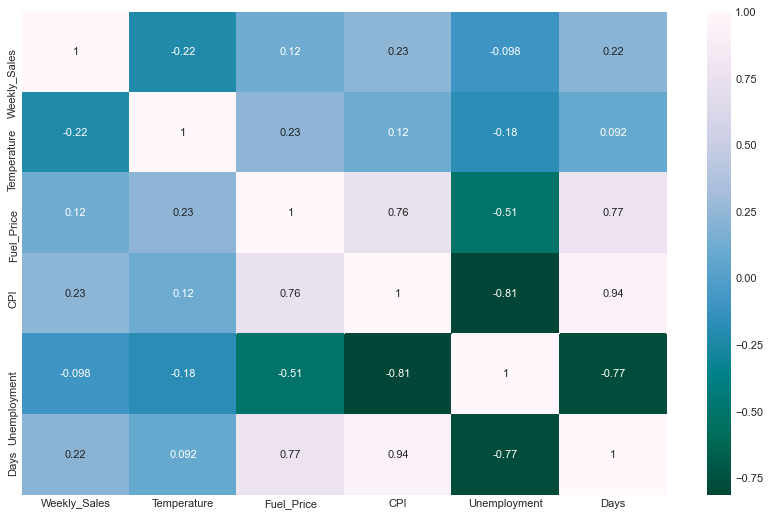

In [32]:
import seaborn as sns
corr = store_1.corr()
plt.figure(figsize = (13,8), dpi = 80)
corrmap = sns.heatmap(store_1.corr(), cmap = 'PuBuGn_r', annot = True)
corrmap
plt.show()

### Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

### Insights :
> 1. As we can see __unemployment__ is highly correlated with __days__ and is ___insignificant___ as it correlation with Weekly Sales is __quite low.__ 
> 2. Also __temperature__ and __Unemployment__ are __negatively__ impacting the sales . 
> 3. however __Fuel Price__ and __CPI__ are __positively__ impacting the Sales.


## Model Building : Linear Regression📈

In [33]:
from sklearn.model_selection import train_test_split

X = store_1[['Days', 'Fuel_Price', 'CPI', 'Unemployment']]
y = store_1['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)


print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('-'*40)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (114, 4)
Shape of y_train : (114,)
----------------------------------------
Shape of X_test : (29, 4)
Shape of y_test : (29,)


In [34]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = linear_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 104768.40557779369
Mean Squared Error: 21350591361.516563
Root Mean Squared Error: 146118.41554546286


In [36]:
print('Coefficients: \n',linear_reg.coef_)

Coefficients: 
 [   712.03276817 -97206.78823378  19978.81310442 125101.27927163]


In [37]:
print('Variance score: %.2f' % linear_reg.score(X_test, y_test))

Variance score: -0.16


### Note :
> * From above I can infer that Linear Regression model performs very poorly on our dataset.
> * As we can see the variance is in negative numbers. Which indicates that our model is __Poor__.
> * __Minimum__ variance helps our model to be __ideal / accurate__, Therefore further down I'll implement __RandomForest__ algorithms and check for accuray.
> * If accuracy increses, then I will pick the model.
> * Another way we can check accuracy by showing comparison between actual values and predicted values.

# RandomForestRegressor🎄

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rfr = RandomForestRegressor(n_estimators = 400, max_depth = 15)
rfr.fit(X_train, y_train)
Y_pred = rfr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('-'*40)
print('Variance score: %.2f' % rfr.score(X_test, y_test))

Mean Absolute Error: 104768.40557779369
Mean Squared Error: 21350591361.516563
Root Mean Squared Error: 146118.41554546286
----------------------------------------
Variance score: 0.16


In [40]:
Actual_vs_Pred = pd.DataFrame({"Actual Sales" : y_test, "Predicted Sales": y_pred})
Actual_vs_Pred.head()

,Actual Sales,Predicted Sales
136,1517428.87,1.597046e+06
128,1497954.76,1.618555e+06
114,1621031.70,1.573164e+06
45,1891034.93,1.509153e+06
31,1507460.69,1.526287e+06


***Predicted Demand for Store 1***

In [41]:
# Checking errors :
print('Error :', round(1.597046e+06 - 1517428.87, 2))

Error : 79617.13


In [42]:
print('Error :', round(1.573164e+06 - 1621031.70, 2))

Error : -47867.7


In [43]:
round(((abs(1.573164e+06 - 1621031.70))/1621031.70)*100,2)

2.95

In [44]:
# Errors in % w.r.t the particular store sales : predicted sales and actual sales.
Errors = pd.DataFrame({'errors':round(((abs(y_pred - y_test))/y_test)*100,2)})
Errors.head()

,errors
136,5.25
128,8.05
114,2.95
45,20.19
31,1.25


### Insights : 
> * So here we can see, we have predicted __demand__ for store $1$
> * Further down I've shown a table that shows __errors__ in %, w.r.t the store sales demand.
> * Errors are not huge to decline our model also the __variance__ is good.
> * Therefore we accept this Model - __RandomForest Regressor__.

$Swapnil$  $Narwade$
> *swapnil.narwade3@gmail.com* 🦄